In [29]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import math 
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

<h3> Implement K-Means </h3>

In [15]:
class cluster:

    def __init__(self):
        pass

    def fit(self, X):
        pass

class KMeansClustering:
    
    def __init__(self, k = 5, max_iterations = 100):
        self.k = k
        self.max_iterations = max_iterations
        self.centroids = None
        
    def fit(self, X):
        # Randomly initialize centroids, in range(rows) and k number of centroids
        self.centroids = X[np.random.choice(range(len(X)), self.k, replace = False)]
        # Loop runs max number of times = max_iterations
        for iteration in range(self.max_iterations):
            # Will contain the cluster index that a data point belongs to - example for 8 data points with k = 2 {1, 0, 1, 0, 0, 0, 0, 1}
            clusters = np.zeros(len(X))
            # For every data point in the dataset
            for i in range(len(X)):
                # Find the eucledian distance of that point to all centroids
                distance = np.sqrt(np.sum((X[i] - self.centroids) ** 2, axis = 1))
                # Pick the min distance out of all the distances
                cluster = np.argmin(distance);
                # For the datapoint (denoted as index i in clusters) assign the index
                clusters[i] = cluster
            new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(self.k)])
            if(np.all(new_centroids == self.centroids)):
                break
            self.centroids = new_centroids
        return self.centroids, clusters

In [16]:
X = np.array([ [0, 0], [2, 2], [0, 2], [2, 0], [10, 10], [8, 8], [10, 8], [8, 10] ])
kmeans = KMeansClustering(k = 2, max_iterations = 100)
print(kmeans.fit(X))

(array([[9., 9.],
       [1., 1.]]), array([1., 1., 1., 1., 0., 0., 0., 0.]))


<h3> Performance Comparison </h3>

In [17]:
X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)

In [18]:
kmeans2 = KMeansClustering(k = 4, max_iterations = 50)

Centroids:
 [[-1.20405793  7.83785843]
 [ 2.3104637   1.35327054]
 [ 1.62316429  0.42718918]
 [-0.32655551  3.62917162]]
Cluster distribution: Counter({3.0: 344, 0.0: 175, 1.0: 93, 2.0: 88})


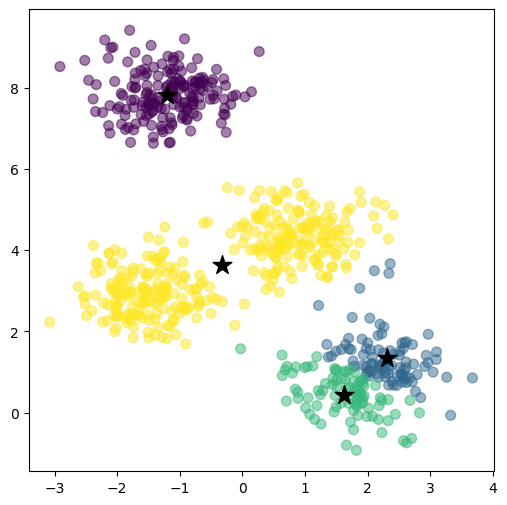

Centroids:
 [[-1.20405793  7.83785843]
 [-1.49970942  2.90574194]
 [ 0.90043932  4.32217464]
 [ 1.9877063   0.83188579]]
Cluster distribution: Counter({2.0: 176, 0.0: 175, 3.0: 175, 1.0: 174})


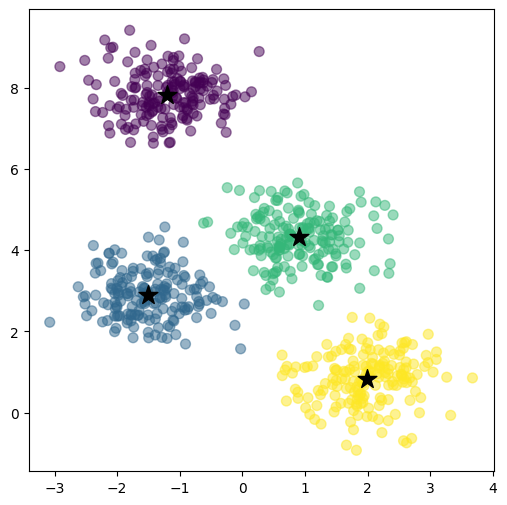

Centroids:
 [[-0.30656092  3.62014043]
 [ 1.98903778  0.85916936]
 [-1.66771618  7.9565278 ]
 [-0.79524098  7.73322522]]
Cluster distribution: Counter({0.0: 348, 1.0: 177, 3.0: 93, 2.0: 82})


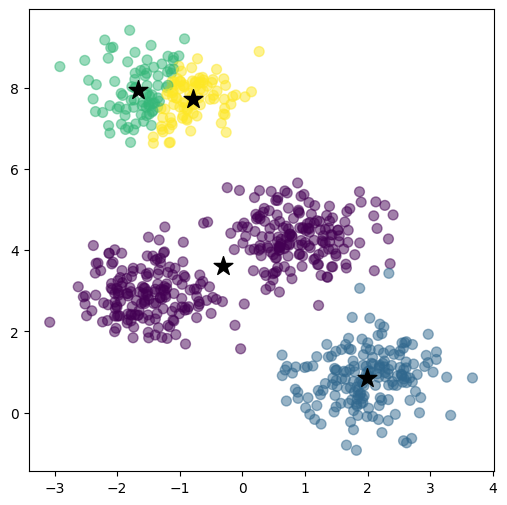

In [19]:
for iteration in range(3):
    centroids, clusters = kmeans2.fit(X)
    print("Centroids:\n", centroids)
    print("Cluster distribution:", Counter(clusters))
    plt.figure(figsize=(6, 6))  
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, alpha = 0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='*', label='Centroids')
    plt.show()

In [20]:
sklearn_kmans = KMeans(n_clusters = 4, max_iter = 100, random_state = 0)
sklearn_kmans.fit(X)
sklearn_clusters = sklearn_kmans.labels_

/Users/1998p1/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
ari = adjusted_rand_score(cluster_assignments, clusters)

In [23]:
ari_sklearn = adjusted_rand_score(cluster_assignments, sklearn_clusters)

In [24]:
print(f"ARI for custom implementation: {ari}")
print(f"ARI for scikit-learn implementation: {ari_sklearn}")

ARI for custom implementation: 0.6247464834825839
ARI for scikit-learn implementation: 0.9961850080391301


Text(0.5, 1.0, 'Sklearn K-Means Clusters')

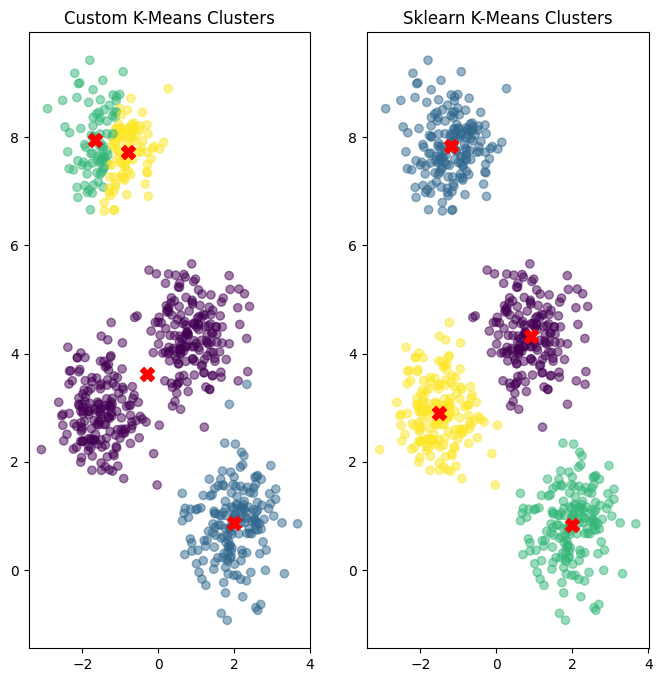

In [26]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='X') 
plt.title('Custom K-Means Clusters')
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=sklearn_clusters, cmap='viridis', alpha=0.5)
plt.scatter(sklearn_kmans.cluster_centers_[:, 0], sklearn_kmans.cluster_centers_[:, 1], c='red', s=100, marker='X')
plt.title('Sklearn K-Means Clusters')

<h3> Choose and run clustering algorithms </h3>

<h4>Chicago Taxi Dataset</h4>

In [108]:
chicago_taxi = pd.read_csv('Taxi_Trips__2013-2023_.csv')

> EDA

In [109]:
chicago_taxi.shape

(101788, 23)

> <div style="text-align: justify"> The dataframe has 101788 rows and 23 columns <br>
> According to https://data.cityofchicago.org/Transportation/Taxi-Trips-2013-2023-/wrvz-psew/about_data, the Taxi Trips dataset hosted by the City of Chicago contains detailed trip data for taxis operating within the city from 2013 to 2023. It includes information such as trip start and end times, pickup and dropoff locations, distances traveled, fares, tips, and payment types. This dataset serves as a valuable resource for analyzing transportation trends, taxi service demand, and urban mobility patterns over the decade.
<div>

In [110]:
chicago_taxi.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location'],
      dtype='object')

In [111]:
chicago_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     101788 non-null  object 
 1   Taxi ID                     101779 non-null  object 
 2   Trip Start Timestamp        101788 non-null  object 
 3   Trip End Timestamp          101788 non-null  object 
 4   Trip Seconds                101763 non-null  float64
 5   Trip Miles                  101788 non-null  float64
 6   Pickup Census Tract         35179 non-null   float64
 7   Dropoff Census Tract        35054 non-null   float64
 8   Pickup Community Area       95650 non-null   float64
 9   Dropoff Community Area      92192 non-null   float64
 10  Fare                        101681 non-null  float64
 11  Tips                        101681 non-null  float64
 12  Tolls                       101681 non-null  float64
 13  Extras        

> Numerical columns in the dataset include 'Trip Seconds', 'Trip Miles', 'Fare', 'Tips', 'Tolls', 'Extras', 'Trip Total', and the various 'Centroid Latitude' and 'Longitude' fields. Categorical columns are 'Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp', 'Payment Type', 'Company', and 'Dropoff Centroid Location' etc.

In [112]:
null_val = chicago_taxi.isnull().sum()
print(null_val)

Trip ID                           0
Taxi ID                           9
Trip Start Timestamp              0
Trip End Timestamp                0
Trip Seconds                     25
Trip Miles                        0
Pickup Census Tract           66609
Dropoff Census Tract          66734
Pickup Community Area          6138
Dropoff Community Area         9596
Fare                            107
Tips                            107
Tolls                           107
Extras                          107
Trip Total                      107
Payment Type                      0
Company                           0
Pickup Centroid Latitude       6131
Pickup Centroid Longitude      6131
Pickup Centroid Location       6131
Dropoff Centroid Latitude      9299
Dropoff Centroid Longitude     9299
Dropoff Centroid  Location     9299
dtype: int64


> There is a noticeable amount of missing data in certain columns, particularly 'Pickup Census Tract' and 'Dropoff Census Tract' with over 66,000 missing values each, and various centroid location fields with around 6,000 to 9,000 missing values. This could impact analyses that require complete location data. The columns 'Taxi ID', 'Trip Seconds', 'Fare', 'Tips', 'Tolls', 'Extras', and 'Trip Total' have relatively fewer missing values suggesting that financial and temporal data are more consistently recorded.

In [113]:
chicago_taxi.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,101763.000000,101788.000000,3.517900e+04,3.505400e+04,95650.000000,92192.000000,101681.000000,101681.000000,101681.000000,101681.000000,101681.000000,95657.000000,95657.000000,92489.000000,92489.000000
mean,1102.644891,6.021135,1.703149e+10,1.703140e+10,33.230946,25.300764,20.466054,2.452347,0.014503,1.679117,24.739358,41.898703,-87.689956,41.892116,-87.657546
std,1831.031101,7.572349,3.696445e+05,3.377955e+05,25.309183,20.270499,18.103452,3.918353,0.602782,5.208910,22.641634,0.064621,0.104274,0.059306,0.063430
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625
25%,420.000000,0.870000,1.703108e+10,1.703108e+10,8.000000,8.000000,7.750000,0.000000,0.000000,0.000000,9.500000,41.878866,-87.695013,41.878866,-87.663518
50%,836.000000,2.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,13.500000,0.000000,0.000000,0.000000,16.000000,41.895033,-87.642649,41.892508,-87.633308
75%,1516.000000,10.800000,1.703184e+10,1.703184e+10,50.000000,32.000000,31.000000,3.000000,0.000000,1.000000,33.900000,41.949829,-87.626211,41.922686,-87.625192
max,86003.000000,814.300000,1.703198e+10,1.703198e+10,77.000000,77.000000,999.000000,250.000000,78.000000,182.000000,999.000000,42.015934,-87.534903,42.021224,-87.534903


array([[<Axes: title={'center': 'Trip Seconds'}>,
        <Axes: title={'center': 'Trip Miles'}>,
        <Axes: title={'center': 'Pickup Census Tract'}>,
        <Axes: title={'center': 'Dropoff Census Tract'}>],
       [<Axes: title={'center': 'Pickup Community Area'}>,
        <Axes: title={'center': 'Dropoff Community Area'}>,
        <Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Tips'}>],
       [<Axes: title={'center': 'Tolls'}>,
        <Axes: title={'center': 'Extras'}>,
        <Axes: title={'center': 'Trip Total'}>,
        <Axes: title={'center': 'Pickup Centroid Latitude'}>],
       [<Axes: title={'center': 'Pickup Centroid Longitude'}>,
        <Axes: title={'center': 'Dropoff Centroid Latitude'}>,
        <Axes: title={'center': 'Dropoff Centroid Longitude'}>, <Axes: >]],
      dtype=object)

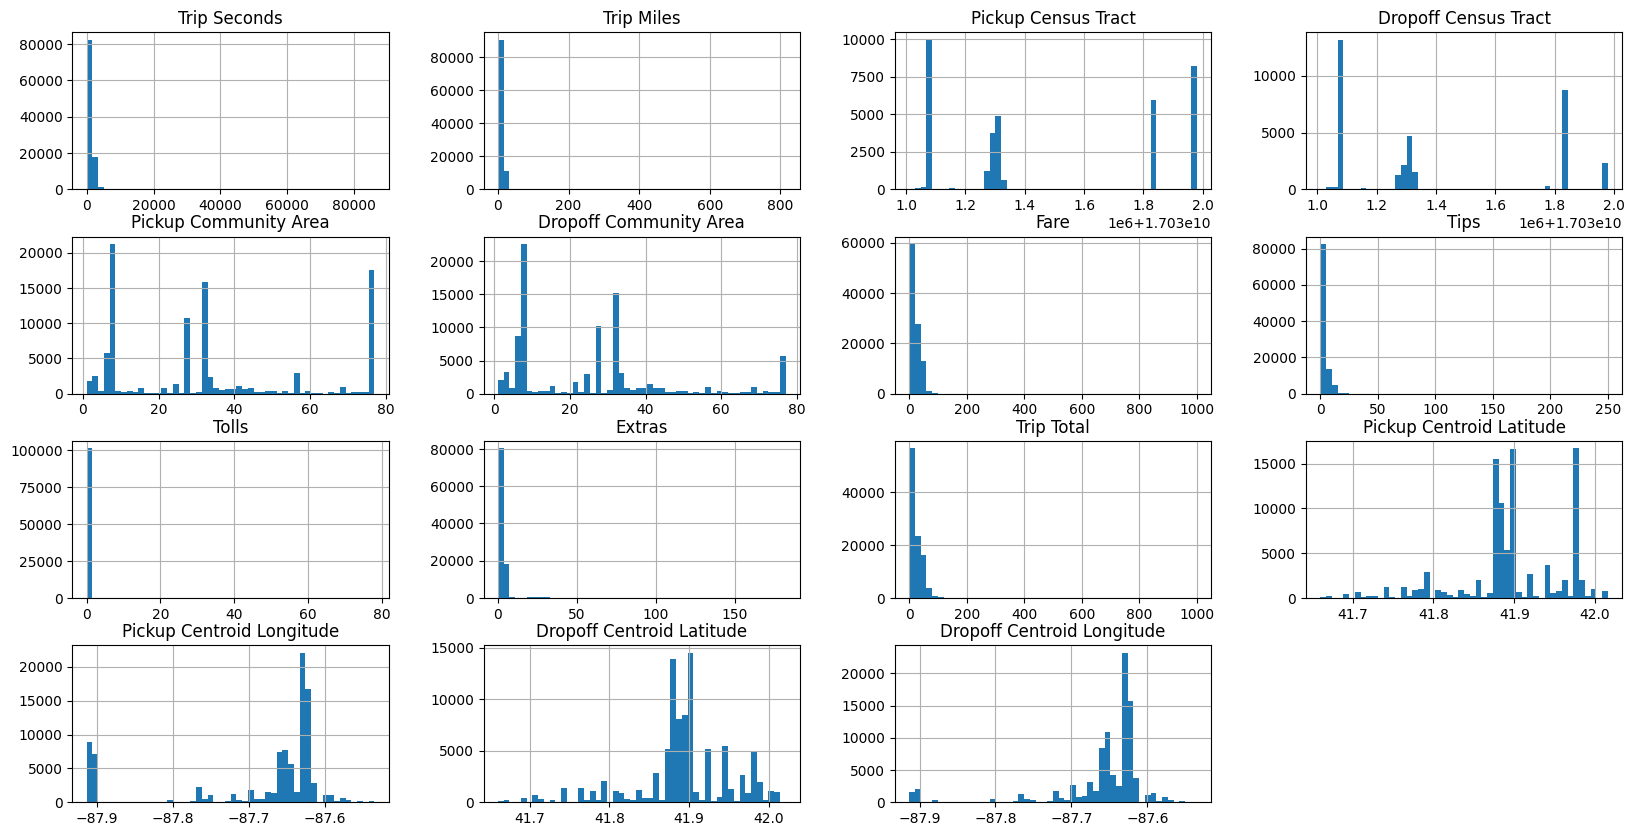

In [114]:
chicago_taxi.hist(bins = 50, figsize = (20,10))

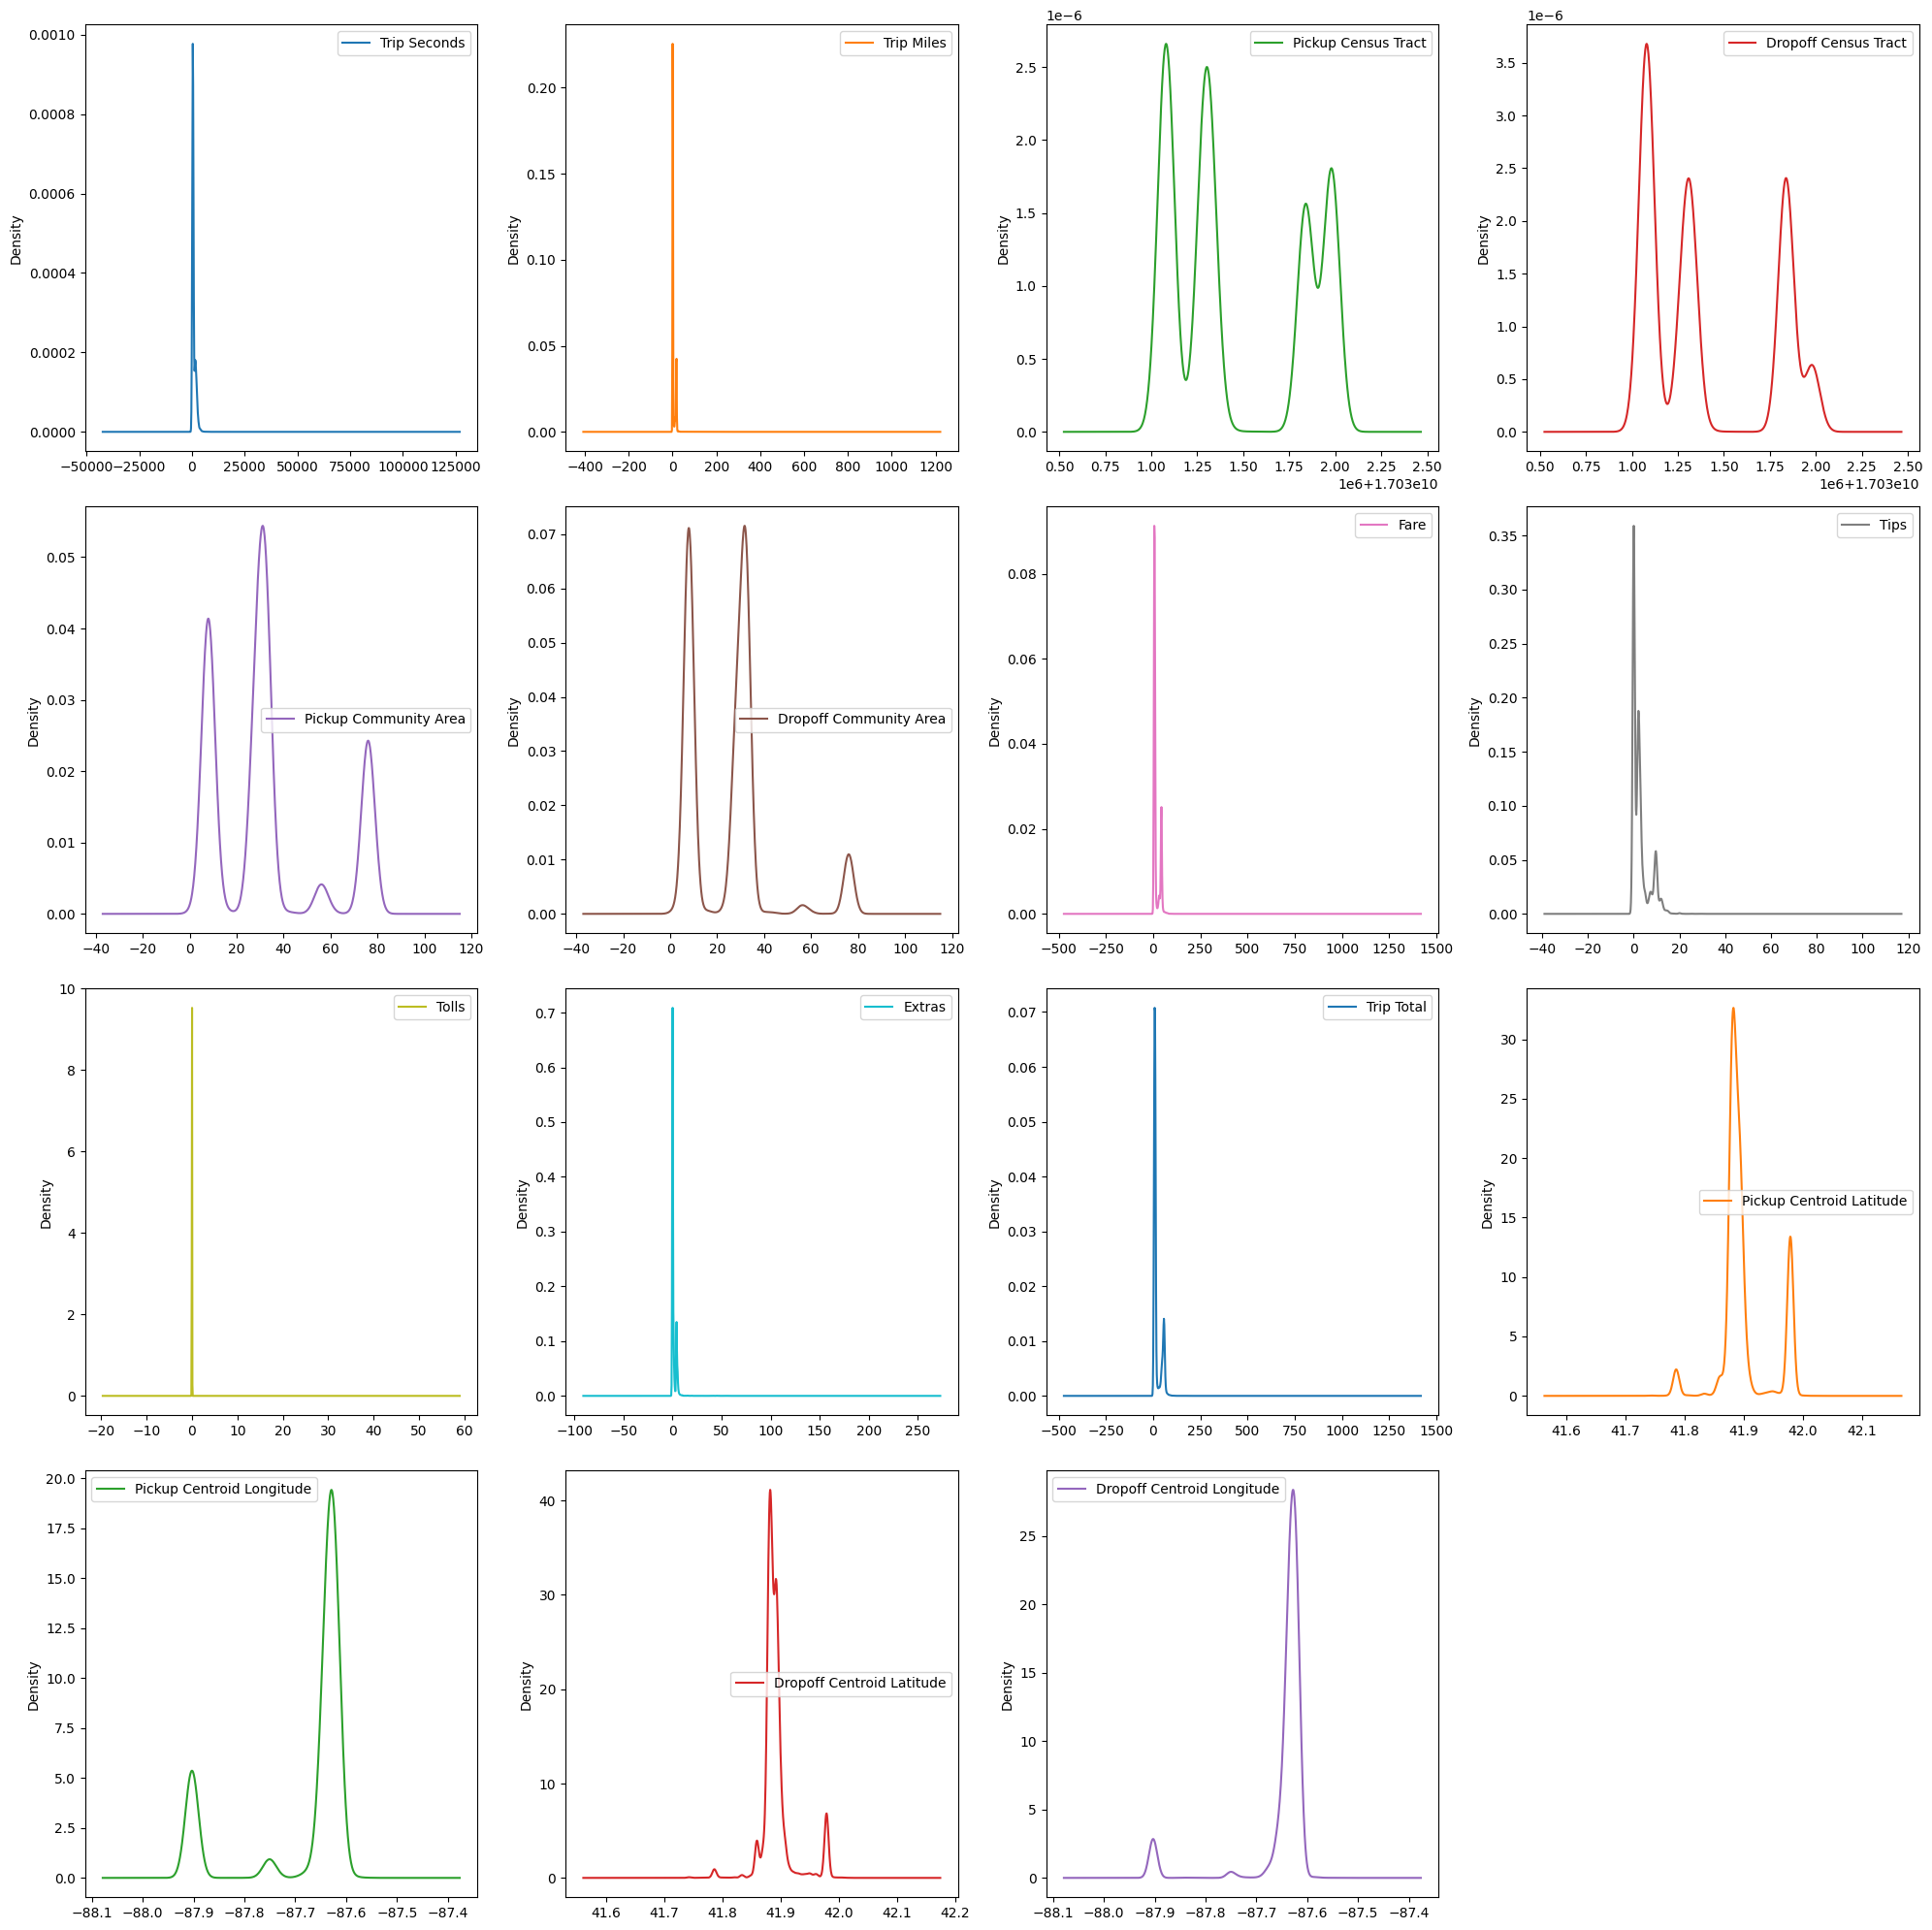

In [115]:
# Calculating how many rows and columns needed based on the number of numerical columns
num_plots = len(numerical_columns)
num_columns = 4
num_rows = np.ceil(num_plots / num_columns).astype(int)
viz.plot(kind='density', subplots=True, layout=(num_rows, num_columns), sharex=False, figsize=(20, num_rows*5))
plt.tight_layout()  
plt.show()

> <div style="text-align: justify"> The large standard deviations in several fields compared to the mean values, along with the significant differences between the 75th percentile and the maximum values, indicate that these fields may have right-skewed distributions with outliers that could significantly affect the mean <br>
> Trip Seconds: There is a significant range in trip duration, with a maximum of 86,003 seconds (approximately 23.9 hours), which is quite extreme compared to the mean trip time of 1,102.64 seconds (about 18 minutes). This suggests some outlier trips with very long durations <br>
> Trip Miles: Similar to trip seconds, trip miles also show a wide range with a maximum of 814 miles, which is very high for a single taxi trip <br>
> Fare: The average fare is roughly \$20.46, with a maximum fare reaching $999.00, which is an outlier when considering the standard deviation is about \$18.10 <br>
> Tips: The average tip is \$2.45 with a maximum of \$250.00 showing that there are generous tips given <br>
> Tolls: Tolls are generally quite low, averaging at about 1.5 cents but the maximum reported toll is \$78.00 <br>
<div>

/var/folders/1q/p62jltqs1g10s6hzbjjqmw8c0000gq/T/ipykernel_30196/4146595483.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(chicago_taxi.corr(), annot = True)


<Axes: >

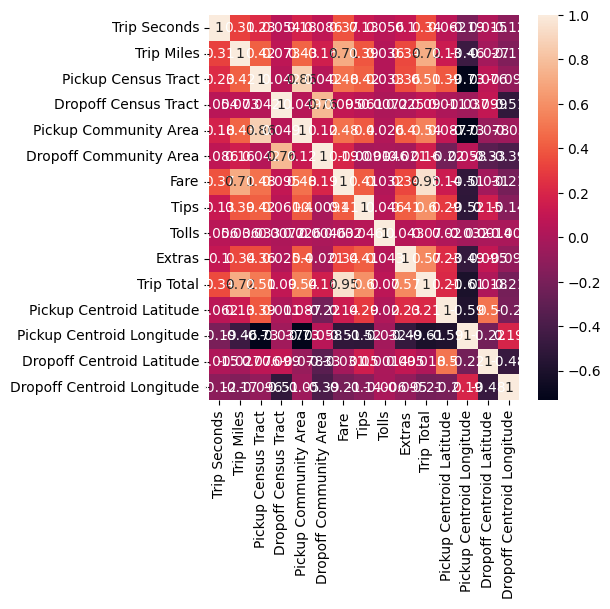

In [116]:
sns.heatmap(chicago_taxi.corr(), annot = True)

> <div style="text-align: justify"> "Trip Total" seems to have a strong positive correlation with "Fare" and "Tips", which is expected as the total trip cost is typically a sum of the base fare, tips, and any additional charges such as tolls and extras. <br>
"Pickup Centroid Latitude" and "Dropoff Centroid Latitude" also display a high degree of correlation, suggesting that trips often occur within similar latitudinal ranges.
<div>

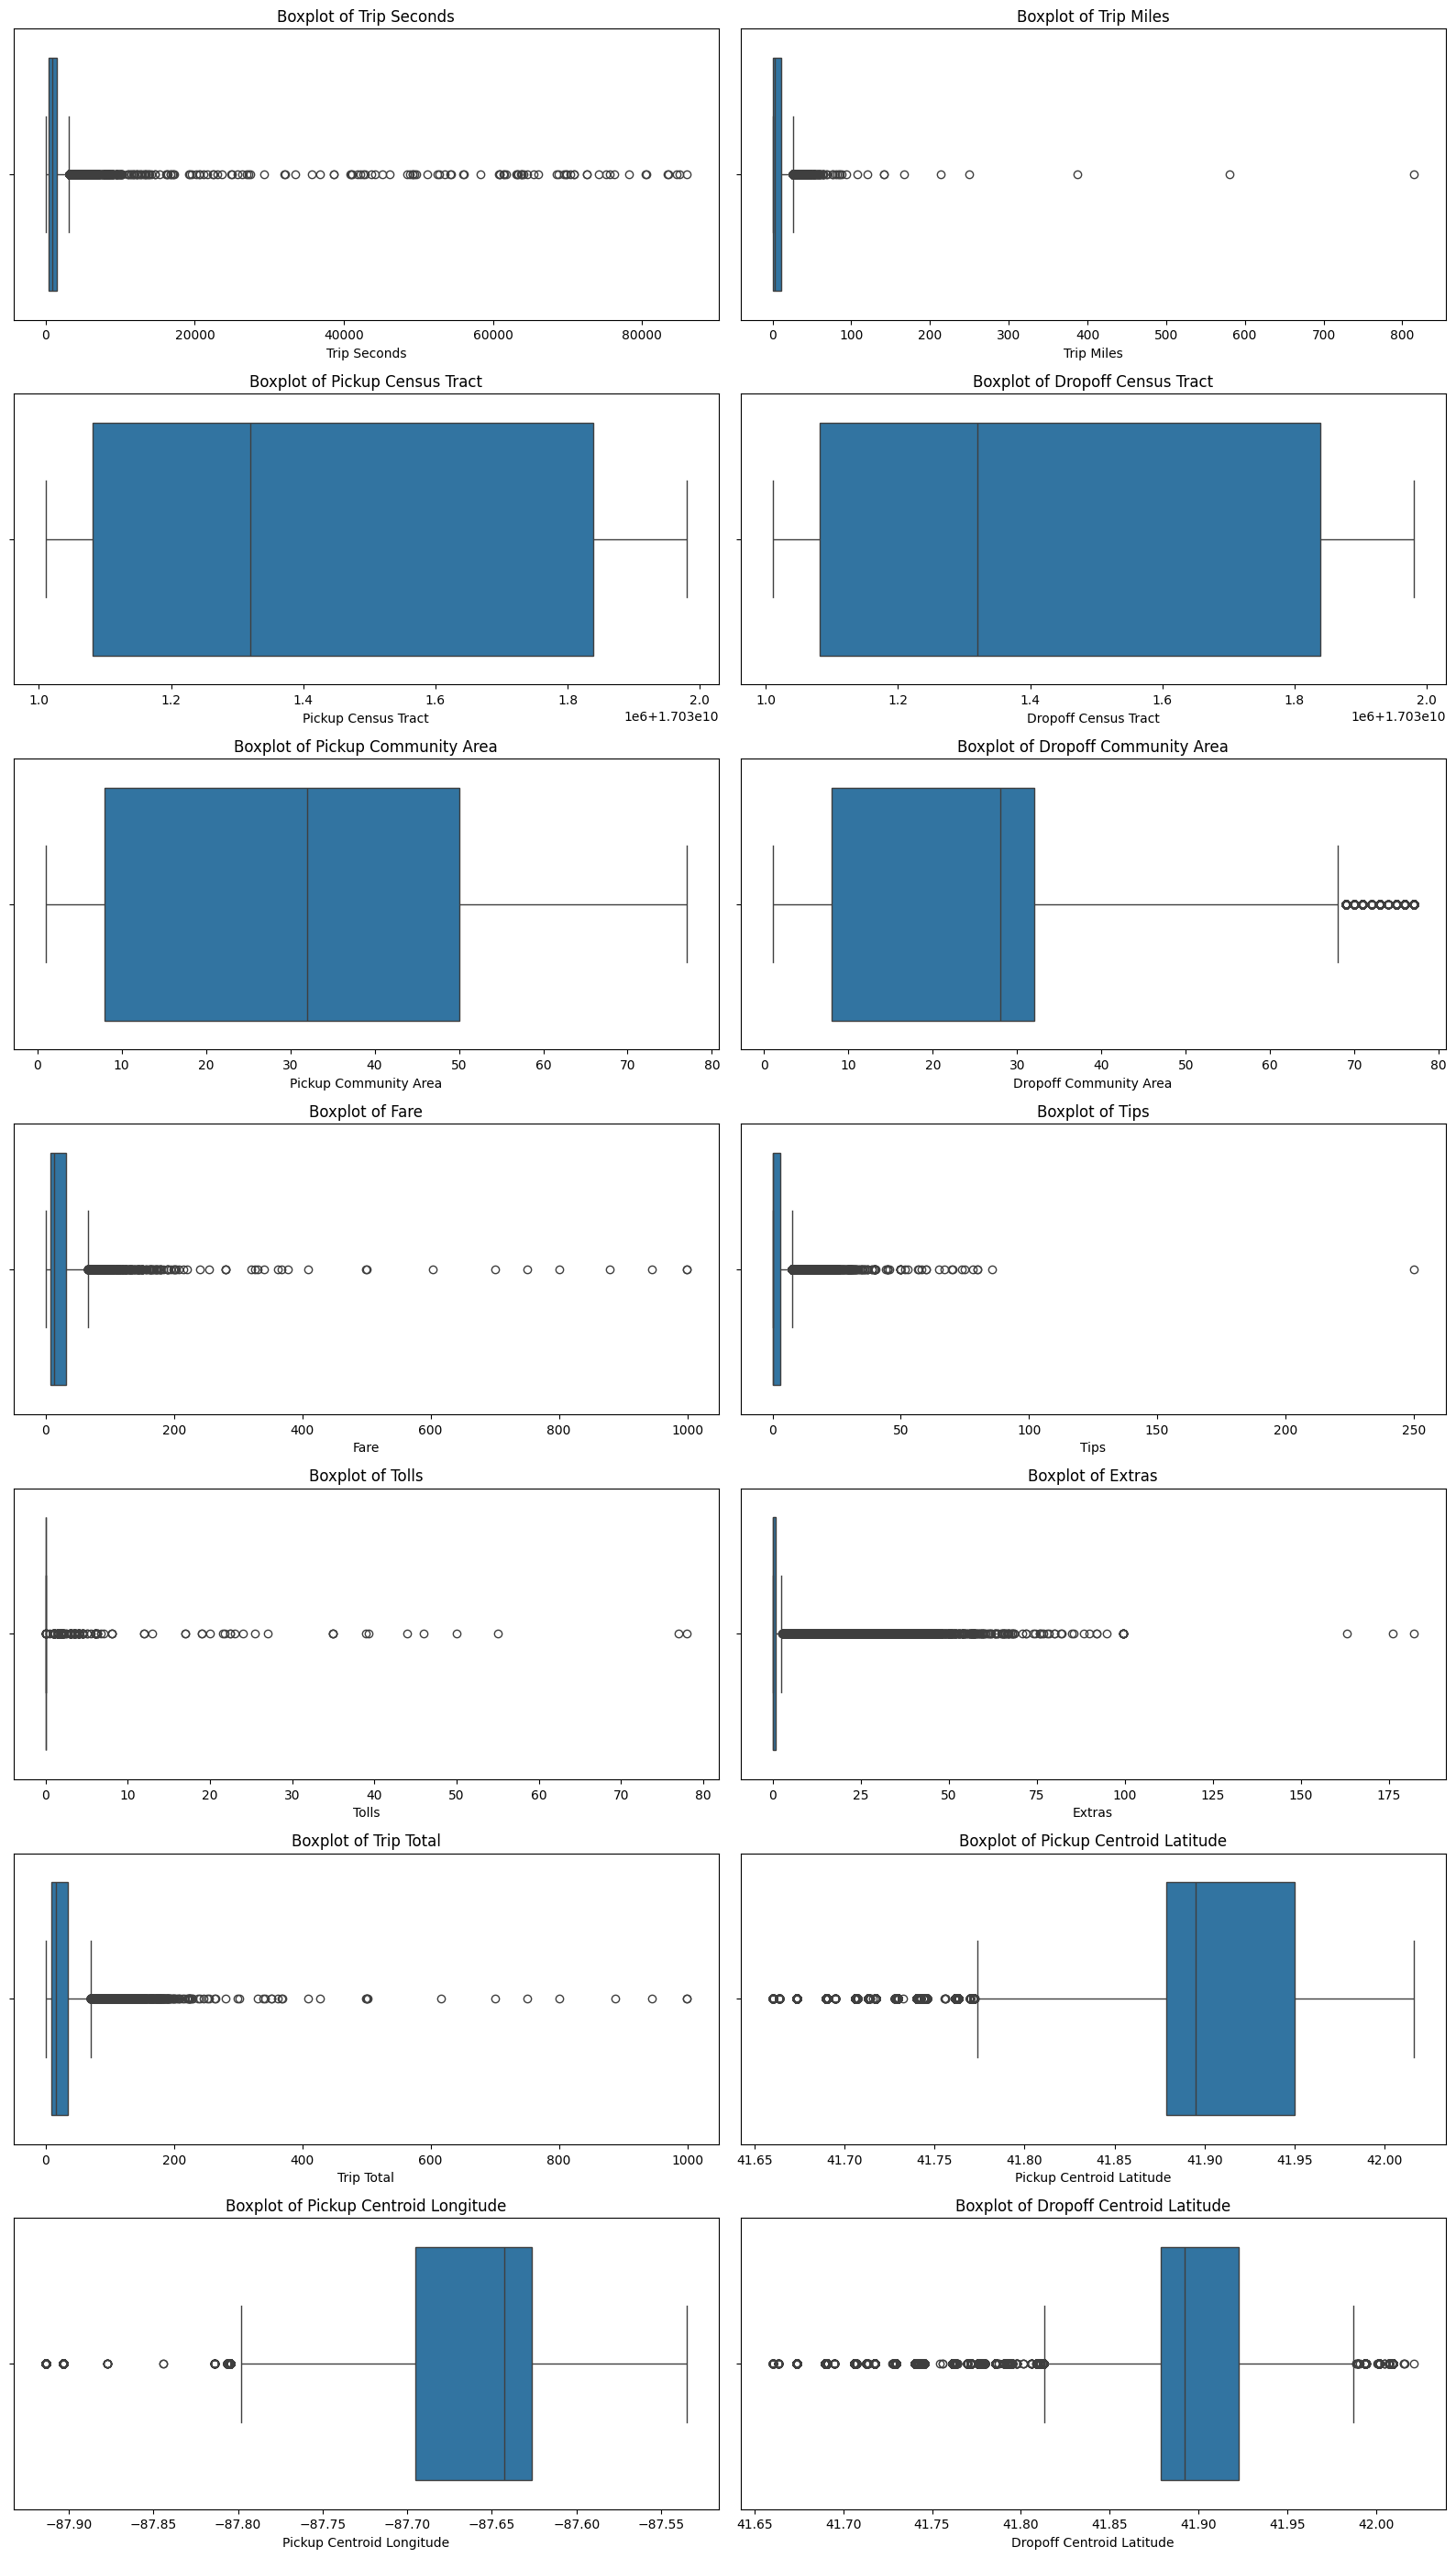

In [117]:
# Select only the numeric features from the DataFrame
numeric_features = chicago_taxi.select_dtypes(include=['float64', 'int64'])
num_features = len(numeric_features.columns)
# Calculate the number of rows needed for subplots based on the number of features
# We divide by 2 because we want 2 plots per row
num_rows = (num_features) // 2 
# Create a subplot grid of the calculated size, with 2 columns
fig, axes = plt.subplots(num_rows, 2, figsize = (16, num_rows * 4))  
axes = axes.flatten() 
# Iterate over the numeric features and their respective axes to create boxplots
for i, feature in enumerate(numeric_features.columns):
    if( i < 14):
        sns.boxplot(x = chicago_taxi[feature], ax = axes[i])
        axes[i].set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()  

> <div style="text-align: justify"> Pickup and Dropoff Centroid Latitude: The latitudes are concentrated within a narrow range, which suggests that most pickups and dropoffs happen within a specific area of Chicago. The outliers are minimal, which indicates there are few trips that start or end outside this central area. <br>
> Pickup Centroid Longitude: Similar to the latitude, the longitude values are also concentrated, indicating a specific longitudinal range for most pickups. The outliers show there are some pickups far from the central cluster.
<div>

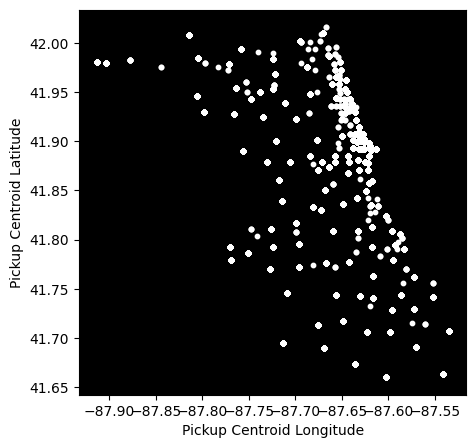

In [118]:
new_style = {'grid': False}
plt.rc('axes', **new_style)   
plt.rcParams['figure.figsize'] = (5, 5)   
P = chicago_taxi.plot(kind='scatter', x='Pickup Centroid Longitude', y='Pickup Centroid Latitude',color='white',s=10)
P.set_facecolor('black') 

> <div style="text-align: justify"> The plot is displaying the geographical locations where taxi pickups occurred with each point representing a pickup event's coordinates <br>
> The distribution of points appears to outline a map-like structure, which resembles the coastal line of Chicago. This could potentially correlate with areas of higher traffic or popular routes within the city. <div>

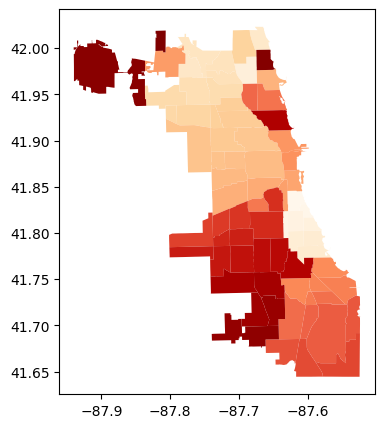

In [119]:
outline = gpd.read_file("boundry.geojson")
outline.plot(cmap='OrRd')
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [120]:
chicago_taxi.dropna(subset=['Pickup Centroid Latitude','Pickup Centroid Longitude'], inplace=True)

<Axes: >

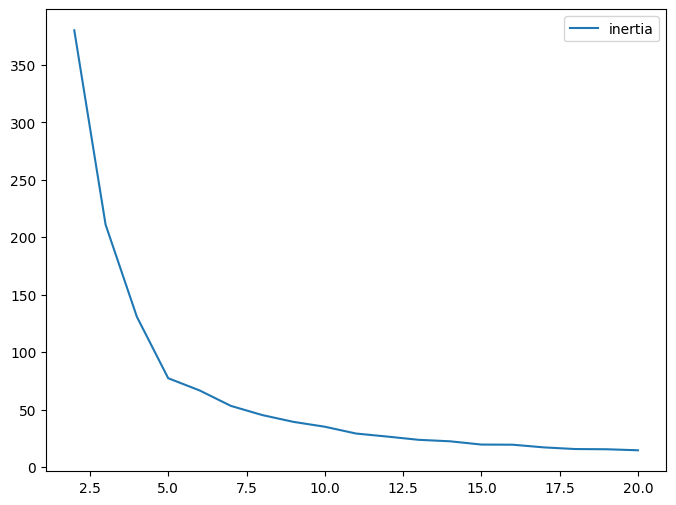

In [121]:
kminertia = pd.DataFrame(data = [], index =range(2,21), columns=['inertia'])
for k in range (2, 21):
    kmeans = KMeans(n_clusters= k, n_init = "auto")
    kmeans.fit(chicago_taxi.iloc[:, 17:19])
    kminertia.loc[k] = kmeans.inertia_

kminertia.plot(kind='line', y='inertia')

/Users/1998p1/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


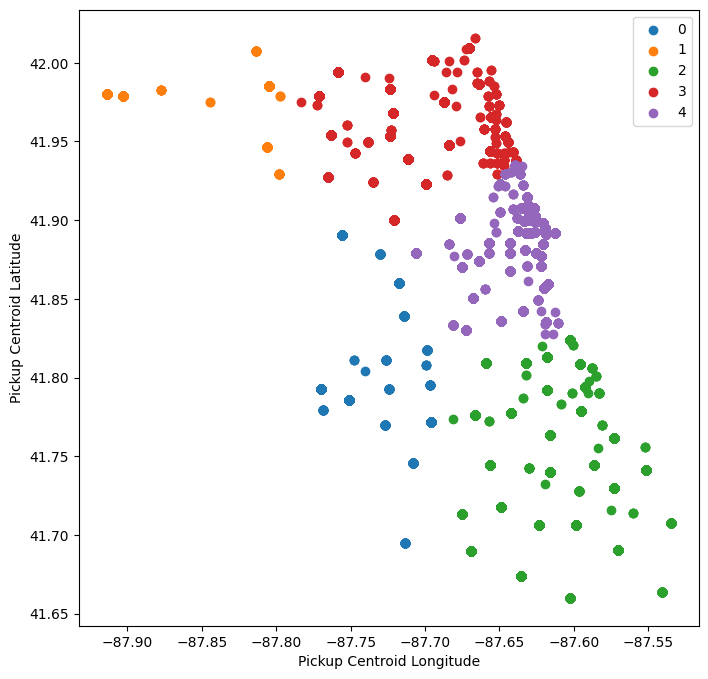

In [122]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(chicago_taxi.iloc[:,17:19])

plt.figure(figsize=(8,8))

for i in np.unique(kmeans.labels_):
    plt.scatter(chicago_taxi.iloc[kmeans.labels_ == i , 18] , chicago_taxi.iloc[kmeans.labels_ == i , 17] , label = i)

plt.legend()
plt.xlabel('Pickup Centroid Longitude')
plt.ylabel('Pickup Centroid Latitude')
plt.show()

In [123]:
silhouette_avg = silhouette_score(chicago_taxi.iloc[:, 17:19], kmeans.labels_)
print(f'The average silhouette_score is: {silhouette_avg}')

The average silhouette_score is: 0.7045257995846838


* The reason why you chose the clustering algorithm(s)

> <div style="text-align: justify"> K-Means was chosen due to its efficiency in identifying distinct groups based on spatial data. It's particularly well-suited for geographical clustering as it minimizes variance within clusters which in this context helps identify hotspots of taxi activity. <br>
> But It also tends to work best with spherical clusters where the data is roughly evenly distributed around a central point. <div>

* Any pre-processing of the data or any hyperparameter settings

> <div style="text-align: justify"> Pre-processing: The data was filtered to only include the 'Pickup Centroid Latitude' and 'Pickup Centroid Longitude' columns, and any rows with missing values in these columns were dropped. This ensures that the clustering algorithm works with complete spatial information <br>
> Hyperparameters: The n_clusters hyperparameter was set to 5 based on the elbow method from the inertia plot which suggests a reasonable trade-off between the number of clusters and the inertia. The n_init parameter was set to "auto" to allow the algorithm to choose the number of initializations based on the n_clusters and data size <div>

* Output from the algorithm(s) -- show what clusters were generated

> The output have been visualized by plotting the identified clusters on a map. Each cluster is represented by a different color showing the grouping of data points based on their pickup locations

* The metrics you used to evaluate the output. What kind of performance did you get from
that algorithm? Is that what you expected?

> <div style="text-align: justify"> The silhouette score ranges from -1 to +1, where a high value indicates that the point is well matched to its own cluster and poorly matched to neighboring clusters <br>
> A silhouette score of 0.704 is considered to be strong. The scatter plot of the clusters aligns with the silhouette score by visually demonstrating distinct groups. 
> The resulting clusters correspond well with known areas of high activity within Chicago, particularly in regions with dense commercial, touristic, and transit hubs. <br>
> The clusters align with the city's urban layout and the typical flow of taxi traffic. Notably the clusters highlight the downtown area and significant neighborhoods such as Near North Side, Loop, Near West Side, O'Hare, and Lake View as prominent locations for taxi activity. <div>

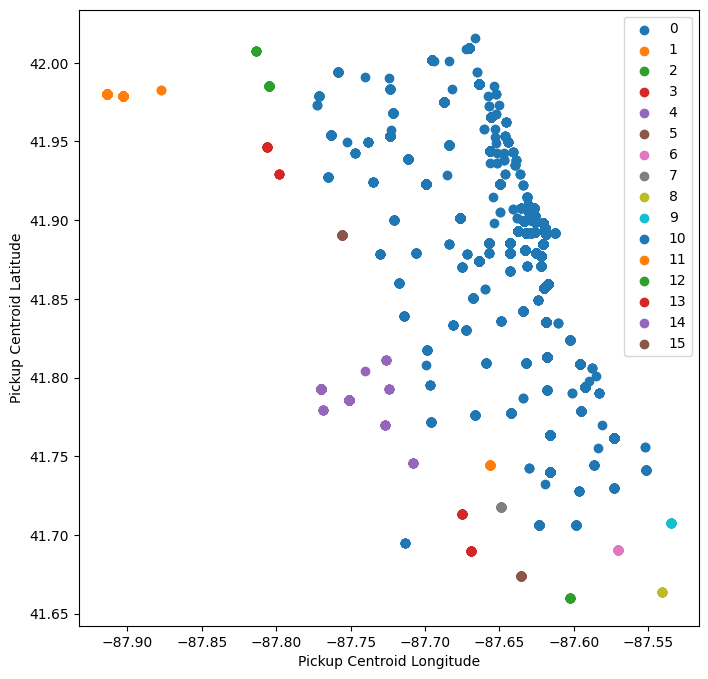

In [135]:
dbscan = DBSCAN(eps=0.026, min_samples=5)
sample4 = chicago_taxi.sample(frac=0.25)
dbscan.fit(sample4.iloc[:,17:19])
plt.figure(figsize=(8,8))
for i in np.unique(dbscan.labels_):
    plt.scatter(sample4.iloc[dbscan.labels_ == i , 18] , sample4.iloc[dbscan.labels_ == i , 17] , label = i)
plt.xlabel('Pickup Centroid Longitude')
plt.ylabel('Pickup Centroid Latitude')
plt.legend()
plt.show()

In [136]:
silhouette_avg_dbscan = silhouette_score(sample4.iloc[:, 17:19], dbscan.labels_[dbscan.labels_ != -1])
silhouette_avg_dbscan

0.5302059818802871

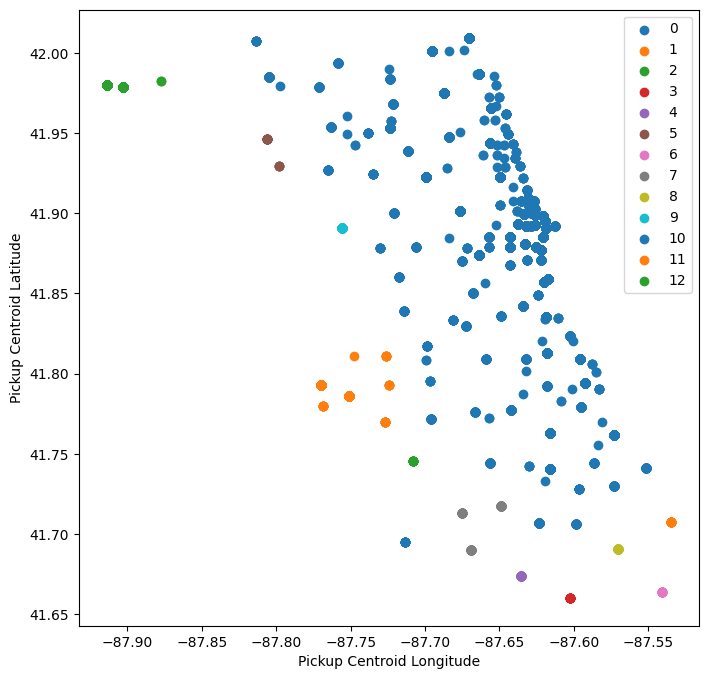

In [126]:
dbscan2 = DBSCAN(eps=0.027, min_samples=10)
sample2 = chicago_taxi.sample(frac=0.25)
dbscan2.fit(sample2.iloc[:,17:19])
plt.figure(figsize=(8,8))
for i in np.unique(dbscan2.labels_):
    plt.scatter(sample2.iloc[dbscan2.labels_ == i , 18] , sample2.iloc[dbscan2.labels_ == i , 17] , label = i)
plt.xlabel('Pickup Centroid Longitude')
plt.ylabel('Pickup Centroid Latitude')
plt.legend()
plt.show()

In [127]:
silhouette_avg_dbscan2 = silhouette_score(sample.iloc[:, 17:19], dbscan2.labels_[dbscan2.labels_ != -1])
silhouette_avg_dbscan2

-0.22990991277296127

* The reason why you chose the clustering algorithm(s)

> <div style="text-align: justify">  DBSCAN excels in identifying clusters of arbitrary shapes which is ideal for geospatial data like taxi pickup locations <br>
> Unlike K-Means DBSCAN does not require pre-specifying the number of clusters making it better suited for data where the number of clusters is not known <br>
<div>

* Any pre-processing of the data or any hyperparameter settings

> <div style="text-align: justify">  The data was randomly sampled to reduce computational load taking a 25% sample of the total dataset to speed up the computation <br>
> For hyperparameters two different eps values (0.026 and 0.027) were tested to observe their impact on cluster formation <br>
> The min_samples parameter was set to define the minimum number of points required to form a dense region with values of 5 and 10 being experimented with <br> <div>

* Output from the algorithm(s) -- show what clusters were generated

> <div style="text-align: justify"> In the clusters generated by DBSCAN visualized in the scatter plots the -1 cluster represents outliers or noise identified by the algorithm <br>
> The fiest cluster (eps=0.026 and min_samples=5) suggests a tight grouping of taxi pickups while the second cluster (eps=0.027 and min_samples=10) indicates a broader more dispersed cluster <div>

* The metrics you used to evaluate the output. What kind of performance did you get from
that algorithm? Is that what you expected?

> <div style="text-align: justify"> For the first DBSCAN model with eps=0.026 and min_samples=5 the silhouette score was approximately 0.53 indicating moderate cluster cohesion. This suggests that the clusters were fairly well-defined which is a satisfactory outcome for clustering tasks <br>
> For the second DBSCAN model with eps=0.027 and min_samples=10 the silhouette score was approximately -0.23. A negative silhouette score indicates that some clusters may have been incorrectly assigned or that there is overlap between clusters implying that the data points might be closer to neighboring clusters than their own. This is an indication that the chosen eps value might have been too large causing more points to be considered part of a cluster thereby diminishing the quality of the clustering <br>
> The performance of the first DBSCAN model may have been as expected or better given the nature of geospatial data which tends to have areas of high density corresponding to popular pickup locations
<div>

<h4>Mopsi Data Subset</h4>

In [148]:
mopsi_data = pd.read_table("MopsiLocationsUntil2012-Finland.txt", header = None)
mopsi_data.head()

,0,1
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437


In [149]:
mopsi_data.shape

(13467, 2)

In [150]:
mopsi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13467 entries, 0 to 13466
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       13467 non-null  int64
 1   1       13467 non-null  int64
dtypes: int64(2)
memory usage: 210.5 KB


In [151]:
mopsi_data.describe()

,0,1
count,13467.000000,13467.000000
mean,625094.775897,289004.669043
std,7844.331518,20399.428325
min,599247.000000,212016.000000
25%,625930.000000,296164.000000
50%,626018.000000,297448.000000
75%,626192.000000,297796.500000
max,697835.000000,314328.000000


In [152]:
mopsi_data /= 10000

In [153]:
mopsi_data.describe()

,0,1
count,13467.000000,13467.000000
mean,62.509478,28.900467
std,0.784433,2.039943
min,59.924700,21.201600
25%,62.593000,29.616400
50%,62.601800,29.744800
75%,62.619200,29.779650
max,69.783500,31.432800


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
      dtype=object)

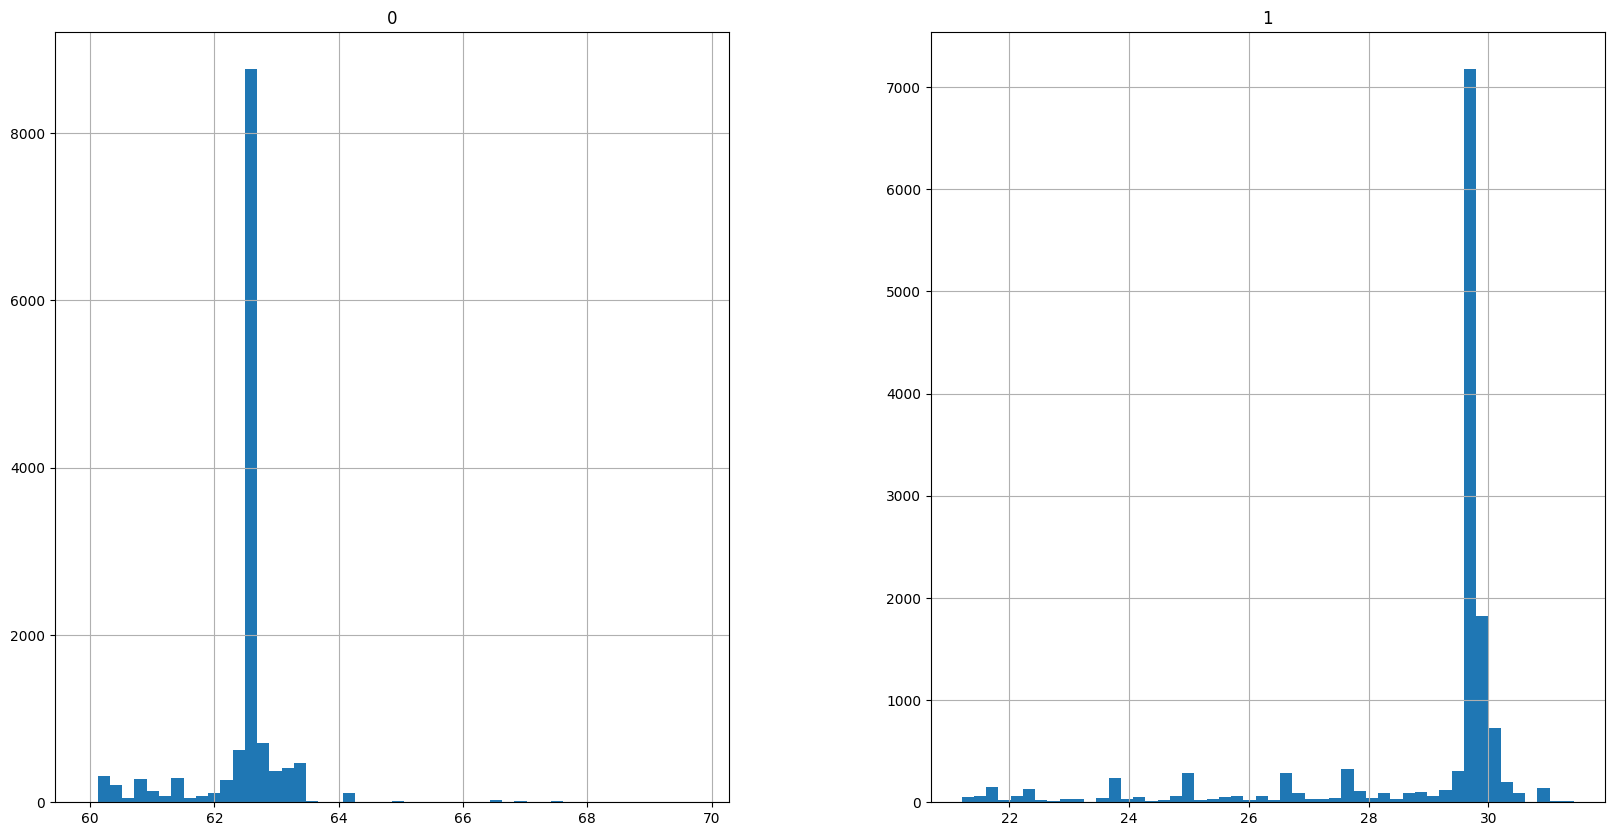

In [154]:
mopsi_data.hist(bins = 50, figsize = (20,10))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

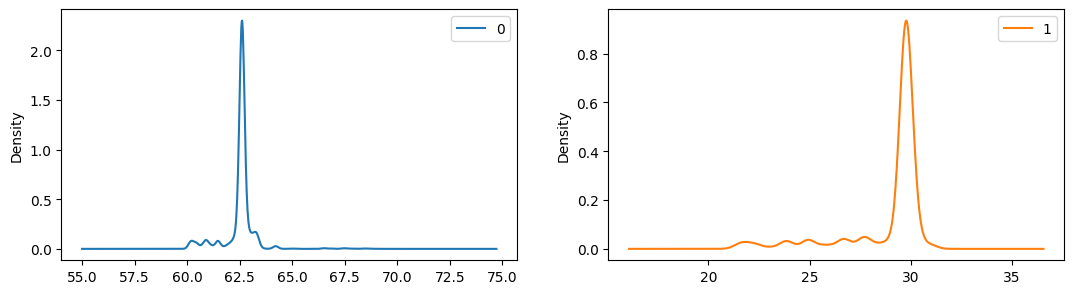

In [155]:
mopsi_data.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, figsize = (20, 15))

In [156]:
mopsi_data.dropna(inplace=True)

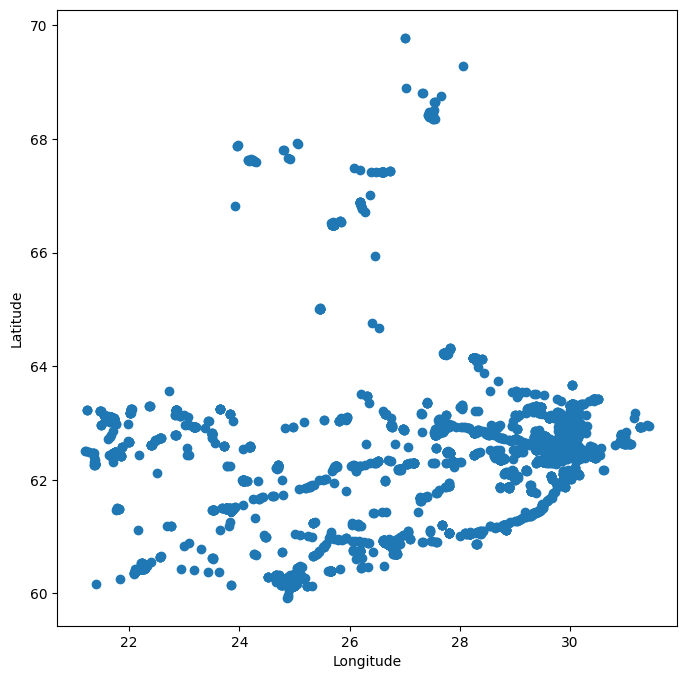

In [157]:
plt.figure(figsize=(8,8))
plt.scatter(mopsi_data[1], mopsi_data[0])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Axes: >

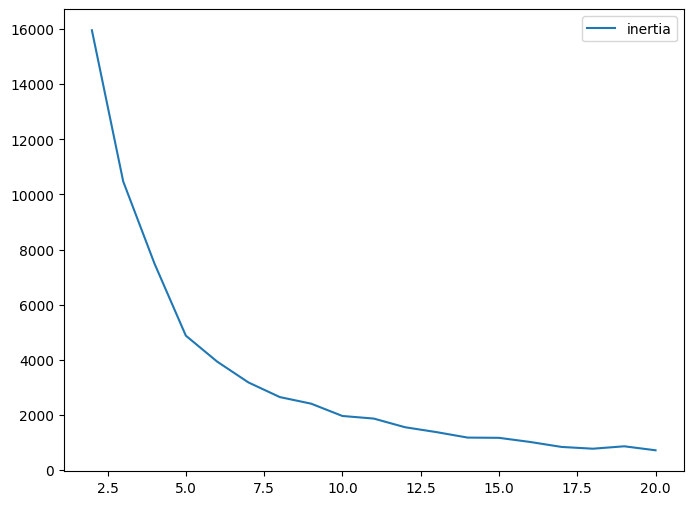

In [158]:
mopsi_inertia = pd.DataFrame(data = [], index =range(2,21), columns=['inertia'])
for j in range (2, 21):
    kmeans = KMeans(n_clusters= j, n_init = "auto")
    kmeans.fit(mopsi_data.iloc[:, :])
    mopsi_inertia.loc[j] = kmeans.inertia_
mopsi_inertia.plot(kind='line', y='inertia')

/Users/1998p1/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


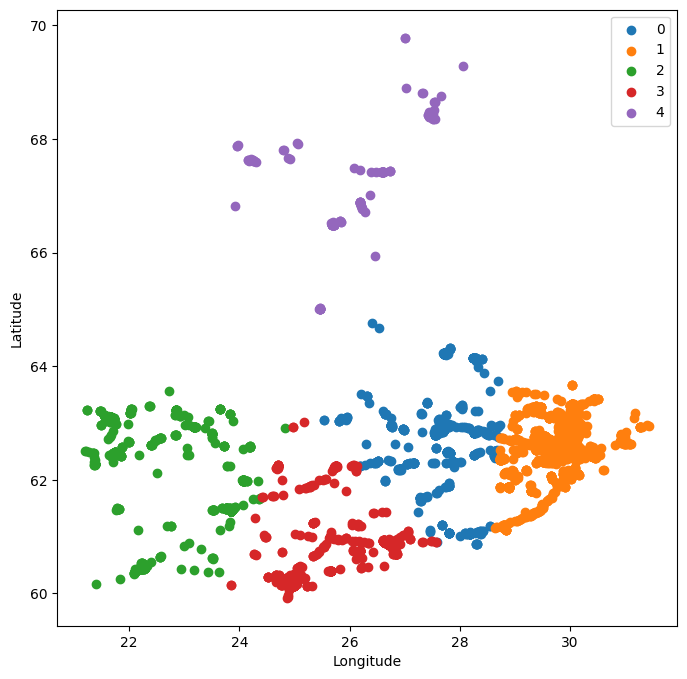

In [159]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(mopsi_data.iloc[:,:])
plt.figure(figsize=(8,8))
for i in np.unique(kmeans.labels_):
    plt.scatter(mopsi_data.iloc[kmeans.labels_ == i , 1] , mopsi_data.iloc[kmeans.labels_ == i , 0] , label = i)
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [160]:
silhouette_avg = silhouette_score(mopsi_data.iloc[:, :], kmeans.labels_)
print(f'The average silhouette_score is: {silhouette_avg}')

The average silhouette_score is: 0.796697591435373


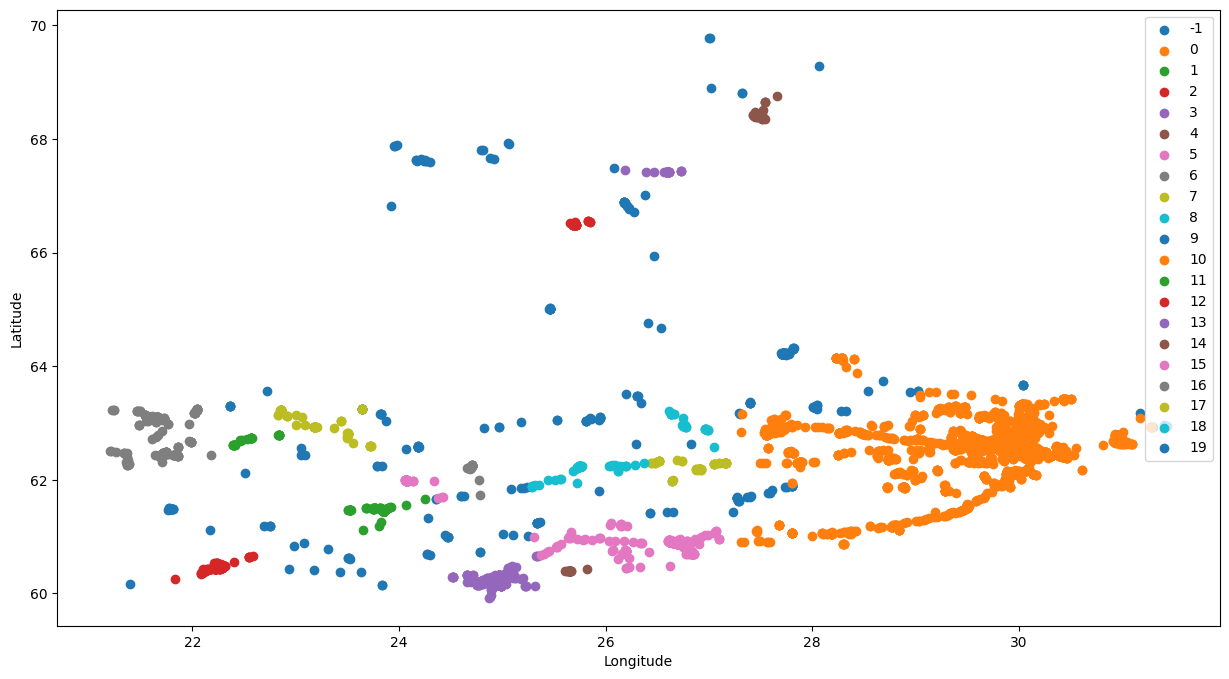

In [163]:
dbscan_mopsi = DBSCAN(eps=0.3, min_samples=20)
dbscan_mopsi.fit(mopsi_data.iloc[:, :])
plt.figure(figsize=(15,8))
for i in np.unique(dbscan_mopsi.labels_):
    plt.scatter(mopsi_data.iloc[dbscan_mopsi.labels_ == i , 1], mopsi_data.iloc[dbscan_mopsi.labels_ == i, 0] , label=i)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [167]:
dbscan_mopsi = DBSCAN(eps=0.3, min_samples=20)
dbscan_mopsi.fit(mopsi_data.iloc[:, :])
mask = dbscan_mopsi.labels_ != -1
filtered_data = mopsi_data.iloc[mask, :]
filtered_labels = dbscan_mopsi.labels_[mask]
silhouette_mopsi = silhouette_score(filtered_data, filtered_labels)
print(silhouette_mopsi)

0.7473487729742269


* The reason why you chose the clustering algorithm(s)

> <div style="text-align: justify"> I selected DBSCAN for its capacity to identify clusters with arbitrary shapes and its insensitivity to outliers which is particularly useful for geographical data like the Mopsi dataset that often contains noise. <br>
> Additionally, I employed K-Means for its computational efficiency partitioning data into distinct subsets. I also chose both to compare the performance of centroid-based clustering against the density-based clustering provided by DBSCAN and to explore the structure of the data when the number of clusters is imposed. <div>

* Any pre-processing of the data or any hyperparameter settings

> <div style="text-align: justify"> Prior to clustering I normalized the data by dividing by 10000 ensuring that both longitude and latitude were on a comparable scale which is crucial for distance-based algorithms <br>
> For DBSCAN I set the eps to 0.3 and min_samples to 20 to determine the minimum number of points required to form a dense region <br>
> In K-Means I determined the optimal number of clusters by implementing the elbow method iterating the number of clusters from 2 to 20 <div>

* Output from the algorithm(s) -- show what clusters were generated

> <div style="text-align: justify"> DBSCAN identified several clusters of varying sizes along with noise points which were not assigned to any cluster (labelled as -1). The clusters appeared to be geographically coherent correlating well with the dense regions of data points <br>
> And K-Means resulted in a clear partition of the data into distinct groups <div>

* The metrics you used to evaluate the output. What kind of performance did you get from
that algorithm? Is that what you expected?

> <div style="text-align: justify"> I used the silhouette score as the metric to evaluate the clustering performance <br>
> For DBSCAN, the silhouette score obtained was approximately 0.75 which suggests a reasonably good structure has been found by the algorithm. This was somewhat expected given the spatial nature of the data and the algorithm's ability to capture the varying densities. 
> If we look at the resulting clusters from DBSCAN, it looks like the algorithm was able to detect routes, and mapped one route to a cluster, which is most likely what we want.
> In K-Means the performance evaluation through the silhouette score gave 0.79 which means all points were well matched to their clusters suggesting good clustering performance. But, the clusters are more spherical, and the algorithm actually ended up slashing the routes, so we had one route in 2 different clusters even though they should have belonged to one cluster. 
<div>

<h3>Extend K-Means (optional)</h3>

In [37]:
class cluster:

    def __init__(self):
        pass

    def fit(self, X):
        pass

class KMeansClustering:
    
    def __init__(self, k = 5, max_iterations = 100, balanced = False):
        self.k = k
        self.max_iterations = max_iterations
        self.centroids = None
        self.balanced = balanced

    def fit(self, X):
        if not self.balanced:
            return self.unbalanced(X)
        else:
            return self.k_balanced(X)
        
    def unbalanced(self, X):
        # Randomly initialize centroids, in range(rows) and k number of centroids
        self.centroids = X[np.random.choice(range(len(X)), self.k, replace = False)]
        # Loop runs max number of times = max_iterations
        for iteration in range(self.max_iterations):
            # Will contain the cluster index that a data point belongs to - example for 8 data points with k = 2 {1, 0, 1, 0, 0, 0, 0, 1}
            clusters = np.zeros(len(X))
            # For every data point in the dataset
            for i in range(len(X)):
                # Find the eucledian distance of that point to all centroids
                distance = np.sqrt(np.sum((X[i] - self.centroids) ** 2, axis = 1))
                # Pick the min distance out of all the distances
                cluster = np.argmin(distance);
                # For the datapoint (denoted as index i in clusters) assign the index
                clusters[i] = cluster
            new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(self.k)])
            if(np.all(new_centroids == self.centroids)):
                break
            self.centroids = new_centroids
        return self.centroids, clusters

    def k_balanced(self, X):
        # The target size for each cluster slightly overestimating to ensure balance
        target_cluster_size = math.ceil(len(X) * 1.1 / self.k)
        # Initialize an array to hold the index of the cluster each point is assigned to
        cluster_assignments = [None] * len(X)
        # Randomly select initial centroids from the data points
        self.centroids = X[np.random.choice(range(len(X)), self.k, replace=False)]
        iteration = 0
        prev_centroids = None
        while iteration < self.max_iterations:
            # Initialize a list to hold the points assigned to each cluster
            clusters_points = [[] for _ in range(self.k)]
            cluster_assignments = [None for _ in range(len(X))]
            # Assign each point to the nearest centroid while respecting the target cluster size
            for point_index, point in enumerate(X):
                # Calculate the distance from this point to each centroid
                distances = np.sqrt(np.sum((point - self.centroids) ** 2, axis=1))
                # Get indices of centroids sorted by distance (nearest first)
                sorted_centroid_indices = np.argsort(distances)
                # Attempt to assign the point to the nearest available cluster
                for centroid_index in sorted_centroid_indices:
                    if len(clusters_points[centroid_index]) < target_cluster_size:
                        clusters_points[centroid_index].append(point)
                        cluster_assignments[point_index] = centroid_index
                        break
            # For any points not assigned due to cluster size limits assign to the least populated cluster
            for point_index, point in enumerate(X):
                if cluster_assignments[point_index] is None:
                    cluster_sizes = [len(cluster) for cluster in clusters_points]
                    least_populated_cluster_index = cluster_sizes.index(min(cluster_sizes))
                    cluster_assignments[point_index] = least_populated_cluster_index
                    clusters_points[least_populated_cluster_index].append(point)
            # Calculate new centroids as the mean of points in each cluster
            new_centroids = np.array([np.mean(points, axis=0) if len(points) > 0 else self.centroids[i] 
                for i, points in enumerate(clusters_points)])
            # If centroids haven't changed significantly, exit the loop
            if prev_centroids is not None and np.allclose(new_centroids, prev_centroids, atol=1e-4):
                break
            prev_centroids = self.centroids
            self.centroids = new_centroids
            iteration += 1
        # Assign each point in X to a cluster based on the final assignments
        final_clusters = np.zeros(len(X), dtype=np.int_)
        for cluster_index, points in enumerate(clusters_points):
            for point in points:
                # Find the index of this point in the original dataset (X)
                point_index = np.where(np.all(X == point, axis=1))[0][0]
                final_clusters[point_index] = cluster_index
        return self.centroids, final_clusters

In [38]:
X = np.array([ [0, 0], [2, 2], [0, 2], [2, 0], [10, 10], [8, 8], [10, 8], [8, 10] ])
kmeans_balanced = KMeansClustering(k = 2, max_iterations = 100, balanced = True)
print(kmeans_balanced.fit(X))

(array([[1., 1.],
       [9., 9.]]), array([0, 0, 0, 0, 1, 1, 1, 1]))


Centroids:
 [[ 0.90793962  4.35713791]
 [-1.34842715  7.72096548]
 [ 2.07187892  0.97422926]
 [-1.62401415  2.9159629 ]]
Cluster distribution: Counter({2: 50, 3: 50, 0: 50, 1: 50})


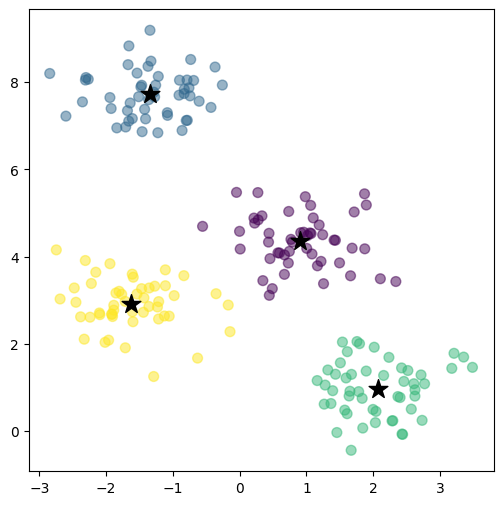

Centroids:
 [[ 0.90793962  4.35713791]
 [-1.34842715  7.72096548]
 [-1.62401415  2.9159629 ]
 [ 2.07187892  0.97422926]]
Cluster distribution: Counter({3: 50, 2: 50, 0: 50, 1: 50})


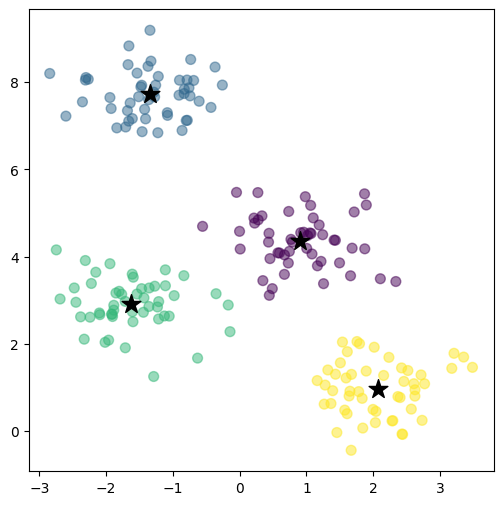

Centroids:
 [[-1.62401415  2.9159629 ]
 [ 2.07187892  0.97422926]
 [ 0.90793962  4.35713791]
 [-1.34842715  7.72096548]]
Cluster distribution: Counter({1: 50, 0: 50, 2: 50, 3: 50})


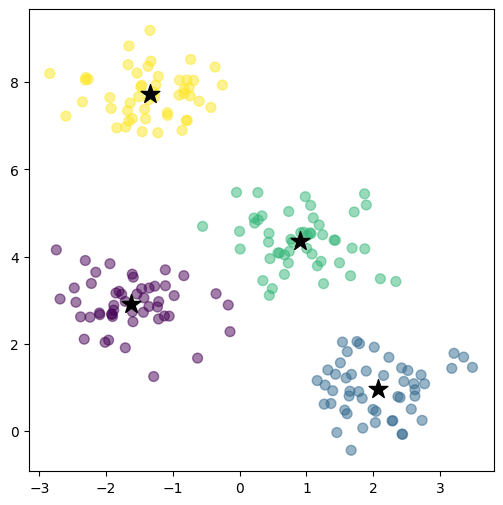

In [40]:
X, cluster_assignments = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=0)
kmeans_b = KMeansClustering(k = 4, max_iterations = 50, balanced = True)
for iteration in range(3):
    centroids, clusters = kmeans_b.fit(X)
    print("Centroids:\n", centroids)
    print("Cluster distribution:", Counter(clusters))
    plt.figure(figsize=(6, 6))  
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, alpha = 0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='*', label='Centroids')
    plt.show()